In [1]:
import pandas as pd
import numpy as np
import sys
import ucm
from because.synth import Reader
from because.probability import prob
from because.visualization import cmodel


In [2]:
df = pd.read_csv("models/M2.csv")

A = np.array(df['A'].tolist())
B = np.array(df['B'].tolist())

print(ucm.uniform_channel_test(B, A))


	**P-values** 
Forward: 0.3866921299925631 
Backward:0.0
Rho-value: 0.3866921299925631
identifiable: True
(0.3866921299925631, True)


## Test M1A:
Simple V structure
Note that the model definition file initializes a distribution at the top, and uses the choice() function with parameter p corresponding to the initial distributions.

getData:  10000 records read.

	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 2.5821678129034353e-11 
Backward:2.5821678129034353e-11
Rho-value: 0.0
identifiable: False

	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 4.508332707153784e-09 
Backward:5.5486102379376234e-09
Rho-value: -1.0402775307838397e-09
identifiable: False
triangles =  [('B', 'A', 'C')]


/Library/Python/3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


0.9025786428566827
Map = 
   A --> B ( 0.3 )
   C --> B ( 0.3 )


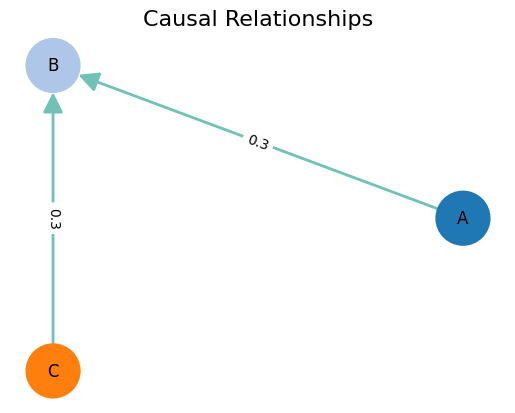

In [3]:
filename = "models/M1Aold.csv"
ds = Reader(filename)
ps = prob.ProbSpace(ds.varData, categorical=['A', 'B', 'C'])
cmodel.show(probspace=ps, targetSpec=['A', 'B', 'C'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


A->B<-C is the correct direction, and was correctly identified by the model.

## Test M1A:
Simple V structure (with UCVar class variables)

getData:  10000 records read.

	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False

	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0018509413153152687
Rho-value: -0.0018509413153152687
identifiable: False
triangles =  [('B', 'A', 'C')]
Map = 
   B --> A ( -0.0 )
   C --> B ( 0.002 )


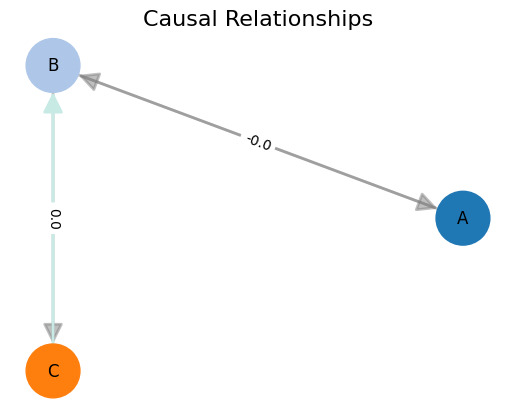

In [4]:
filename = "models/M1A.csv"
ds = Reader(filename)
ps = prob.ProbSpace(ds.varData, categorical=['A', 'B', 'C'])
cmodel.show(probspace=ps, targetSpec=['A', 'B', 'C'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


With modified file, the model did not do as well to predict the correct causal graph.

Conditioning using subspace might fix the issue:


	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.6964215668349265
Rho-value: -0.6964215668349265
identifiable: True
triangles =  []
Map = 
   C --> B ( 0.696 )


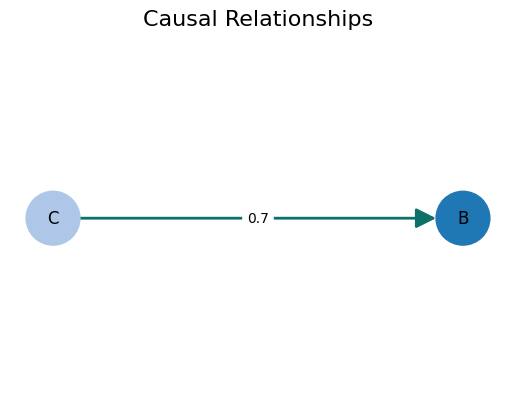

In [5]:
ss = ps.SubSpace([('A', 0)])
cmodel.show(probspace=ss, targetSpec=['B','C'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


triangles =  []
Map = 


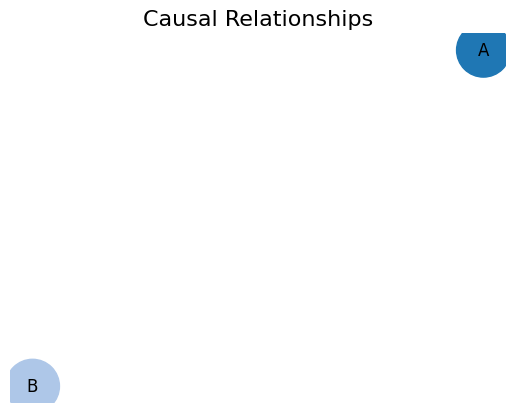

In [6]:
ss = ps.SubSpace([('C', 0)])
cmodel.show(probspace=ss, targetSpec=['A','B'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

In [7]:
ss.testDirection('A','B')


	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.998365689534332 
Backward:0.9983656895343253
Rho-value: 6.772360450213455e-15
identifiable: False


6.772360450213455e-15

TestDirection directly works but doesn't seem like it gets called with cmodel.show -> cdisc.


	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.8541778959896855 
Backward:0.0
Rho-value: 0.8541778959896855
identifiable: True
triangles =  []
Map = 
   A --> B ( 0.854 )


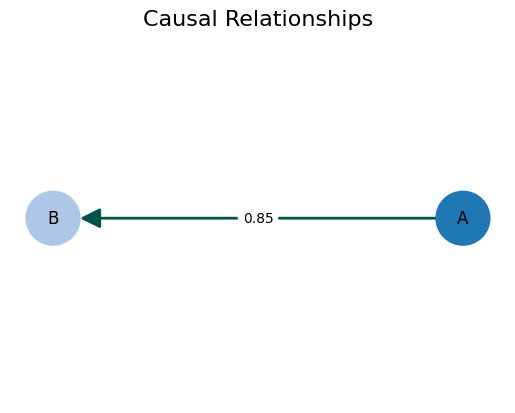

In [8]:
ss = ps.SubSpace([('C', 1)])
cmodel.show(probspace=ss, targetSpec=['A','B'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.10613366770504296 
Backward:0.0
Rho-value: 0.10613366770504296
identifiable: True
triangles =  []
Map = 
   A --> B ( 0.106 )


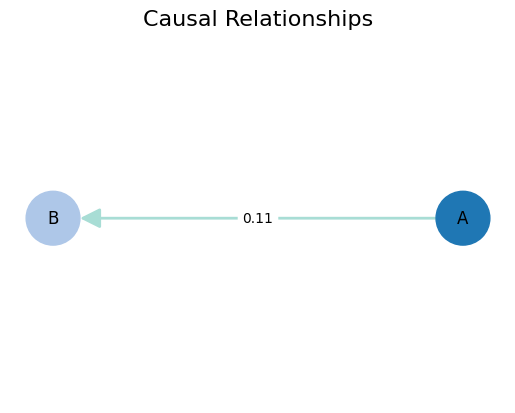

In [9]:
ss = ps.SubSpace([('C', 2)])
cmodel.show(probspace=ss, targetSpec=['A','B'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

triangles =  []
Map = 


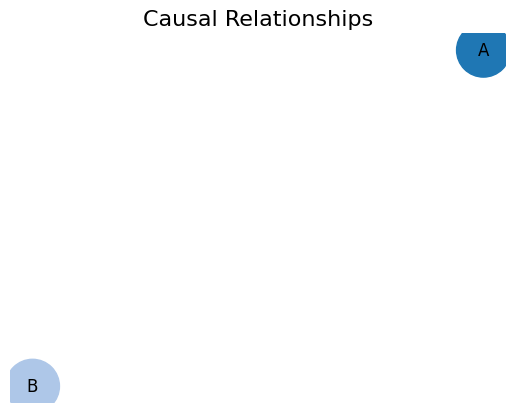

In [10]:
ss = ps.SubSpace([('B', 0)])
cmodel.show(probspace=ss, targetSpec=['A','B'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

## M1A
Conditioning on A yields C->B
conditioning on B yields nothing (as expected)
conditioning on C yields A->B

## Test M1B:
Inverted V
structure


getData:  10000 records read.
0.9998141639216849
0.0


/Library/Python/3.9/site-packages/scipy/stats/_distn_infrastructure.py:2176: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


0.9989437890676743

	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.24677843645412056
Rho-value: -0.24677843645412056
identifiable: True

	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False
triangles =  [('B', 'A', 'C')]
Map = 
   B --> A ( 0.247 )
   C --> B ( -0.0 )


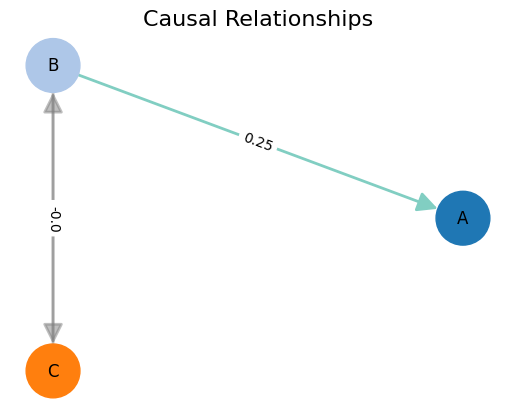

In [11]:
filename = "models/M1B.csv"
ds = Reader(filename)
ps = prob.ProbSpace(ds.varData, categorical=['A', 'B', 'C'])
cmodel.show(probspace=ps, targetSpec=['A', 'B', 'C'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


B->A identified but not B->C (expected, since C does not have a uniform channel distribution)

( Repeating M1B with the alternative distribution definition of C yields the correct directions B->A and B->C )

## Test file: M1C (Growing Chain)

getData:  10000 records read.

	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.6342994529476595 
Backward:0.0
Rho-value: 0.6342994529476595
identifiable: True

	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.8940868823851318 
Backward:0.0
Rho-value: 0.8940868823851318
identifiable: True
triangles =  [('B', 'A', 'C')]
Map = 
   A --> B ( 0.634 )
   B --> C ( 0.894 )


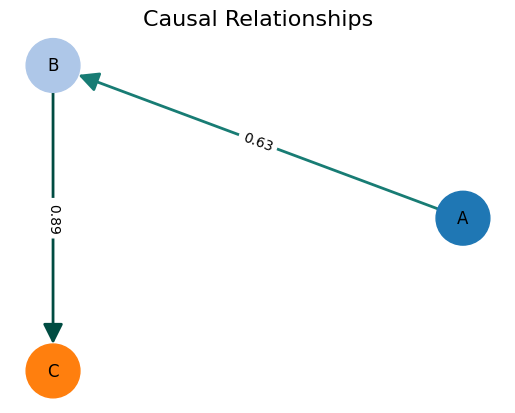

In [12]:
filename = "models/M1C.csv"
ds = Reader(filename)
ps = prob.ProbSpace(ds.varData, categorical=['A', 'B', 'C'])
cmodel.show(probspace=ps, targetSpec=['A', 'B', 'C'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

## Test model: M1C (shrinking chain)

getData:  10000 records read.

	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.30783248182335754 
Backward:0.0
Rho-value: 0.30783248182335754
identifiable: True

	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.48319091634898104 
Backward:0.0
Rho-value: 0.48319091634898104
identifiable: True
triangles =  [('B', 'A', 'C')]
Map = 
   A --> B ( 0.308 )
   B --> C ( 0.483 )


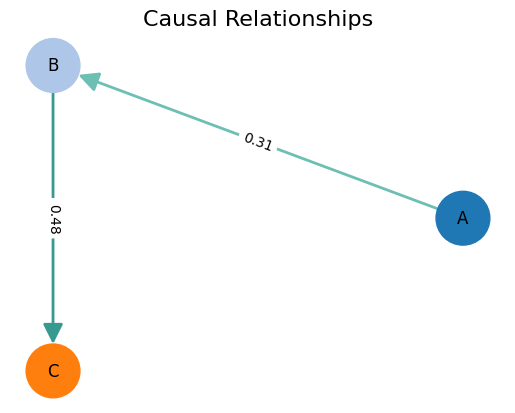

In [13]:
filename = "models/M1Cv2.csv"
ds = Reader(filename)
ps = prob.ProbSpace(ds.varData, categorical=['A', 'B', 'C'])
cmodel.show(probspace=ps, targetSpec=['A', 'B', 'C'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

Both versions of the model seem to predict accurately; the shrinking cardinality maybe slightly less.

## Test model: M2 (Common cause model)

getData:  10000 records read.

	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.3866921299925631
Rho-value: -0.3866921299925631
identifiable: True

	Testing A -> C direction
Using UCM test...

	**P-values** 
Forward: 1.9089095859570193e-09 
Backward:0.0
Rho-value: 1.9089095859570193e-09
identifiable: False
triangles =  [('A', 'B', 'C')]
Map = 
   A --> C ( 0.0 )
   B --> A ( 0.387 )


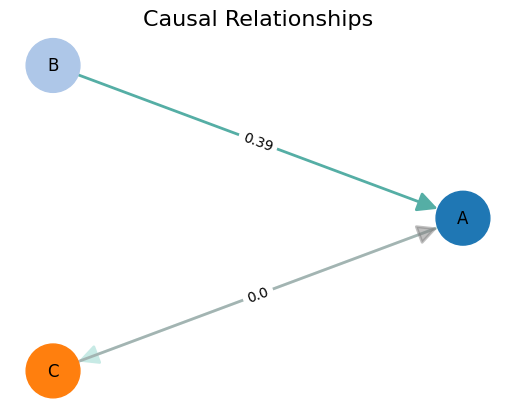

In [14]:
filename = "models/M2.csv"
ds = Reader(filename)
ps = prob.ProbSpace(ds.varData, categorical=['A', 'B', 'C'])
cmodel.show(probspace=ps, targetSpec=['A', 'B', 'C'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

Predicts B->A only. (Sometimes did other predictions correctly on different generations, but was not consistent).

Try testing with subspace and conditioning to see if there are different results.


	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.6093759055292958 
Backward:0.0
Rho-value: 0.6093759055292958
identifiable: True
triangles =  []
Map = 
   B --> C ( 0.609 )


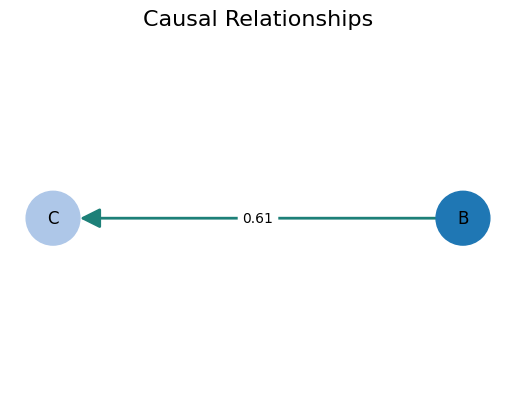

In [15]:
ss = ps.SubSpace([('A', 0)])
cmodel.show(probspace=ss, targetSpec=['C','B'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)



	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.5287968457176331 
Backward:0.0
Rho-value: 0.5287968457176331
identifiable: True
triangles =  []
Map = 
   B --> C ( 0.529 )


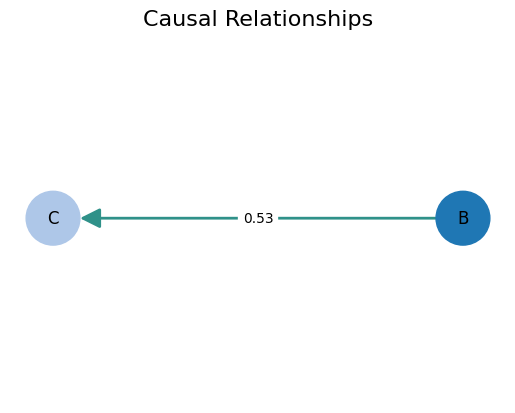

In [16]:
ss = ps.SubSpace([('A', 1)])
cmodel.show(probspace=ss, targetSpec=['C','B'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


	Testing B -> C direction
Using UCM test...

	**P-values** 
Forward: 0.962598723657692 
Backward:0.0
Rho-value: 0.962598723657692
identifiable: True
triangles =  []
Map = 
   B --> C ( 0.963 )


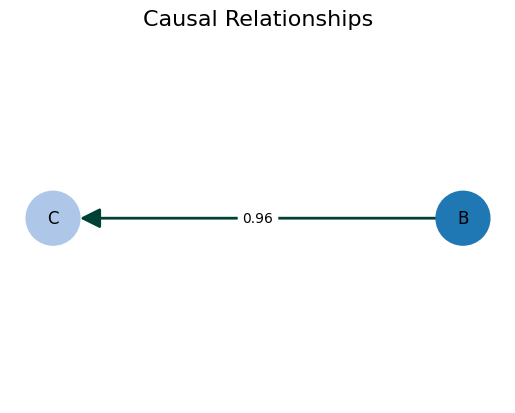

In [17]:
ss = ps.SubSpace([('A', 2)])
cmodel.show(probspace=ss, targetSpec=['C','B'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

Conditioning on A seems to yield B->C


	Testing A -> C direction
Using UCM test...

	**P-values** 
Forward: 0.8495545095223188 
Backward:0.0
Rho-value: 0.8495545095223188
identifiable: True
triangles =  []
Map = 
   A --> C ( 0.85 )


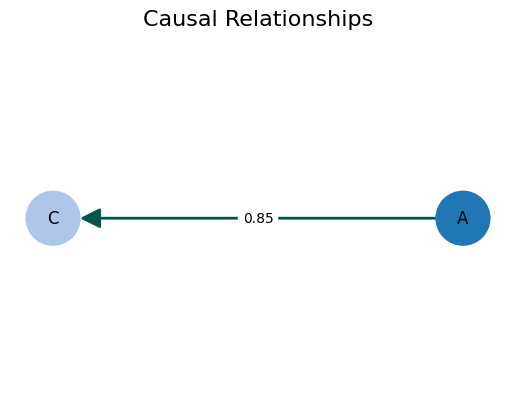

In [18]:
ss = ps.SubSpace([('B', 0)])
cmodel.show(probspace=ss, targetSpec=['C','A'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


	Testing A -> C direction
Using UCM test...

	**P-values** 
Forward: 0.7832085723472961 
Backward:1.3033656709460217e-08
Rho-value: 0.7832085593136394
identifiable: True
triangles =  []
Map = 
   A --> C ( 0.783 )


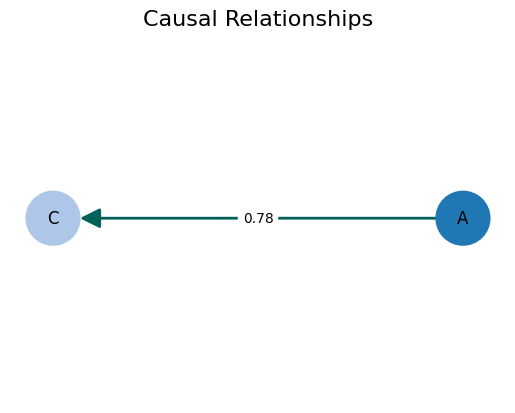

In [19]:
ss = ps.SubSpace([('B', 1)])
cmodel.show(probspace=ss, targetSpec=['C','A'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

Conditioning on B yields A->C


	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:0.0
Rho-value: 0.0
identifiable: False
triangles =  []
Map = 
   B --> A ( -0.0 )


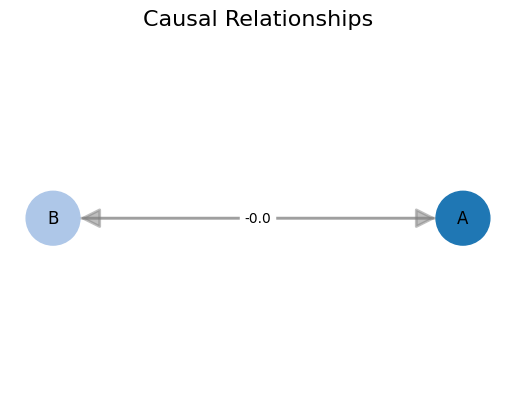

In [20]:
ss = ps.SubSpace([('C', 0)])
cmodel.show(probspace=ss, targetSpec=['B','A'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)


	Testing A -> B direction
Using UCM test...

	**P-values** 
Forward: 0.0 
Backward:1.107408427292178e-06
Rho-value: -1.107408427292178e-06
identifiable: False
triangles =  []
Map = 
   B --> A ( 0.0 )


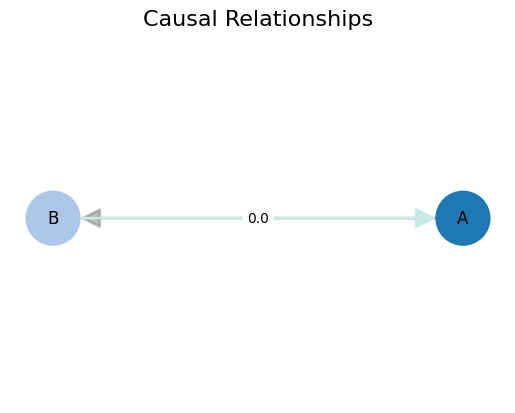

In [21]:
ss = ps.SubSpace([('C', 2)])
cmodel.show(probspace=ss, targetSpec=['B','A'], sensitivity=10, power=5, edgeLabels='rho', verbosity=1)

Seems like conditioning on C blocks flow of information from B->A (this is what we would expect), so the direction is not identifiable.